In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as pltdata
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 

Mean Delay Causes by Cluster:
          carrier_ct  weather_ct      nas_ct  security_ct  late_aircraft_ct
cluster                                                                   
0         24.089269    2.347308   16.101847     0.153397         23.532776
1        635.857170   97.962358  676.598019     4.906981        942.854811
2        248.364269   24.519657  237.673366     2.485650        341.222220

Percentage Contribution of Delay Causes by Cluster:
          carrier_ct  weather_ct     nas_ct  security_ct  late_aircraft_ct
cluster                                                                  
0         36.375109    3.544465  24.313998     0.231631         35.534797
1         26.963902    4.154152  28.691542     0.208083         39.982320
2         29.073440    2.870263  27.821966     0.290969         39.943361


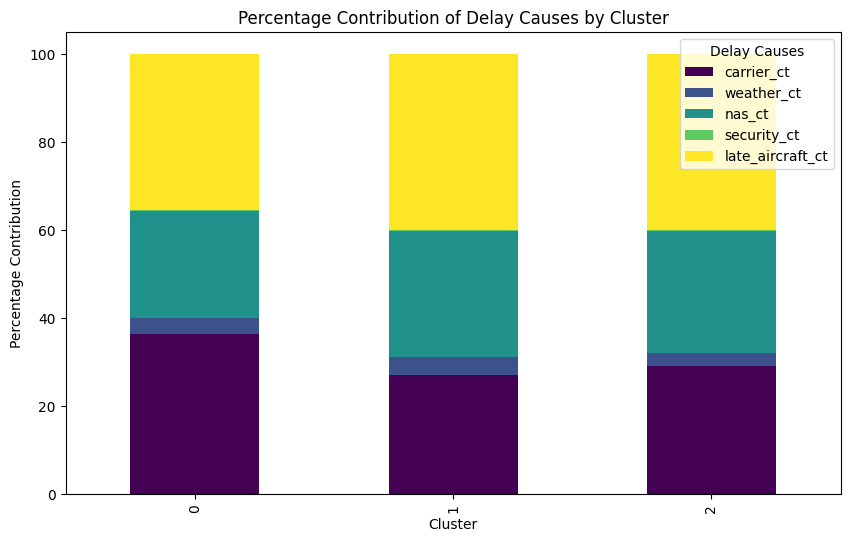


Cluster 0 Analysis:
Top Airports in Cluster:
 airport_name
Portland, OR: Portland International                          185
New Orleans, LA: Louis Armstrong New Orleans International    180
Raleigh/Durham, NC: Raleigh-Durham International              179
Albuquerque, NM: Albuquerque International Sunport            173
Austin, TX: Austin - Bergstrom International                  171
Name: count, dtype: int64
Top Carriers in Cluster:
 carrier_name
Delta Air Lines Inc.      4138
American Airlines Inc.    2824
United Air Lines Inc.     2740
Southwest Airlines Co.    2374
Alaska Airlines Inc.      2133
Name: count, dtype: int64

Cluster 1 Analysis:
Top Airports in Cluster:
 airport_name
Dallas/Fort Worth, TX: Dallas/Fort Worth International    28
Atlanta, GA: Hartsfield-Jackson Atlanta International     28
Charlotte, NC: Charlotte Douglas International            11
Denver, CO: Denver International                           9
Chicago, IL: Chicago Midway International                  9

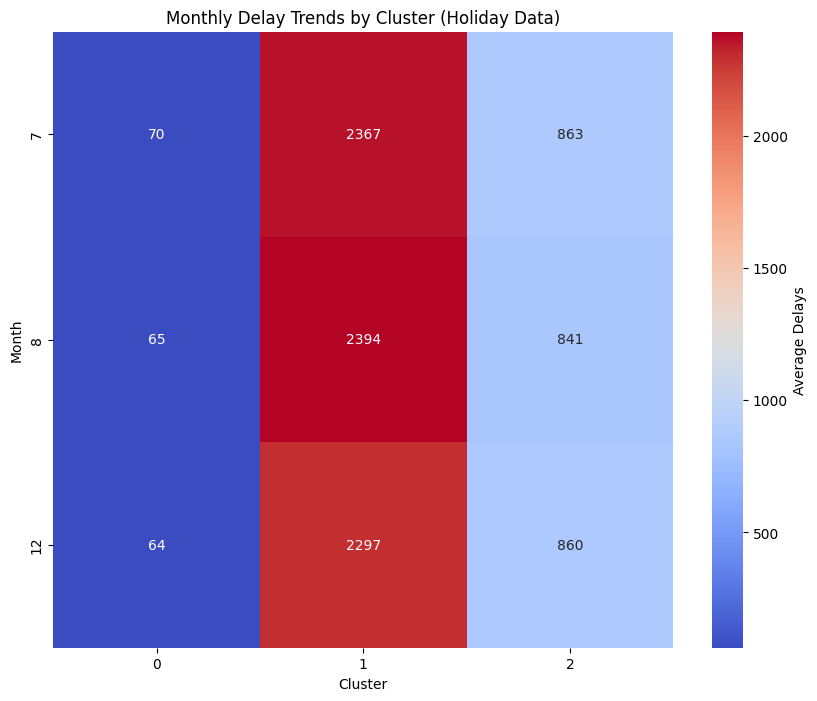

In [ ]:
data = pd.read_csv('Airline_Delay_Cause.csv')

# Holiday months (July, August, December)
holiday_months = [7, 8, 12]
data_holiday = data[data['month'].isin(holiday_months)]

# Filter for top 6 airlines
top_6_airlines = ['DL', 'AA', 'UA', 'WN', 'AS', 'B6']
data_holiday = data_holiday[data_holiday['carrier'].isin(top_6_airlines)]

# Clustering
features = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
X = data_holiday[features]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Scale Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_holiday['cluster'] = kmeans.fit_predict(X_scaled)

# Group by cluster and calculate mean delay causes
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
delay_by_cluster = data_holiday.groupby('cluster')[delay_causes].mean()

# Calculate the percentage contribution of each delay cause
delay_by_cluster_percentage = delay_by_cluster.div(delay_by_cluster.sum(axis=1), axis=0) * 100

# Display mean delay causes and percentage contributions
print("Mean Delay Causes by Cluster:\n", delay_by_cluster)
print("\nPercentage Contribution of Delay Causes by Cluster:\n", delay_by_cluster_percentage)

# Plot percentage contribution
delay_by_cluster_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Percentage Contribution of Delay Causes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage Contribution')
plt.legend(title='Delay Causes')
plt.show()

# Analysis for each cluster
for cluster_num in range(3):
    print(f"\nCluster {cluster_num} Analysis:")
    cluster_data = data_holiday[data_holiday['cluster'] == cluster_num]

    # Distributions
    print("Top Airports in Cluster:\n", cluster_data['airport_name'].value_counts().head())
    print("Top Carriers in Cluster:\n", cluster_data['carrier_name'].value_counts().head())

# Aggregate average delays by month and cluster
monthly_trends = data_holiday.groupby(['month', 'cluster'])['arr_del15'].mean().reset_index()

# Pivot data 
pivot_table = monthly_trends.pivot(index="month", columns="cluster", values="arr_del15")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Average Delays'})
plt.title("Monthly Delay Trends by Cluster (Holiday Data)")
plt.xlabel("Cluster")
plt.ylabel("Month")
plt.show()
